<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/Comb%26ShapeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes on Combining and Shaping Data
#### Excel, SQL, Python, Microsoft Azure
## Joins

When data is not present in a single table, we use *joins* to combine the data. 
To combine/join to different tables we need a column that is common in the two tables. For instance-- if both tables have a column named ```employee_id``` we can use this to join to combine the data on based on this single entity. Records that do no  match this criteria will be eliminated from the result. 
There are different types of joins:


*   Left Outer Join -- using this join, every record on the left table (the master table) will be present in the result with a matching record and padded with nulls for empty entries
*   Right Outer Join -- every record on the right table (the master table) will be present in the result with a matching record or padded with nulls.
*   Full Outer Join -- if we want to preserver information that is equally important and present in both tables then we use a full outer join. Records from both tables will be present in the result with a matching record or padded with nulls.
*   Self Join -- used when a table is joined to itself. There will be no missing records or non-matching column values to deal with and the number of tables is the same as the original tables.
*   Cross Join -- it does not take into account common values in a column. When we perform a cross join every record in the first table will be matched with every record in the second table irrespective of the common column. This is true for all records so performing a cross join in two tables of 3 records each will return a table with 9 records, 3X3. 

## Aggregations

Data in a raw format does not provide useful information and it is necessary to combine it using some kind of aggregation operation. We can perform aggregations on the whole dataset by calculating the sum or average of some column or by getting the count of such column but aggregations are more useful when we group the data by a particular column. 
We can use ```group_by``` to group data by a specific column, i.e. *employee_id*. This operations groups employees by their *employee_id* and creates a grouping with the field used in  *group_by* (the key) and the values associated witht the same key. Once the grouping has been performed we can then perform operations such as sum, count, average to get insights on our data. 

**Pivot** operations convert data from ling form to wide form data to enable aggregations. 

**Unpivot** operations convert data from wide form to long form data. 

## Unions 

Unions refers to the concept to combining data from different sources. In a basic form, copying data from one table to another is a form of union. 


## Joinig tables using Excle's vlookup(), index(), and match()

Using these functions can be complicated so Excel offers the Power Query editor to simplify this process. 

[Link to data source: Playstore App Statistics Dataset](https://www.kaggle.com/lava18/google-play-store-apps)

We can perform join operations in Excel using the **VLOOKUP** function which us used to retrieve data from a specific column in a table.

```VLOOKUP(lookup_value, table_array, col_index_num, [range_lookup])```

Below we have an example of two different tables that we want to join. 
Both tables contain the column 'App' which will be used to join the data. 
We are going to join the 'Translated_Review" from Sheet3 to Sheet2.


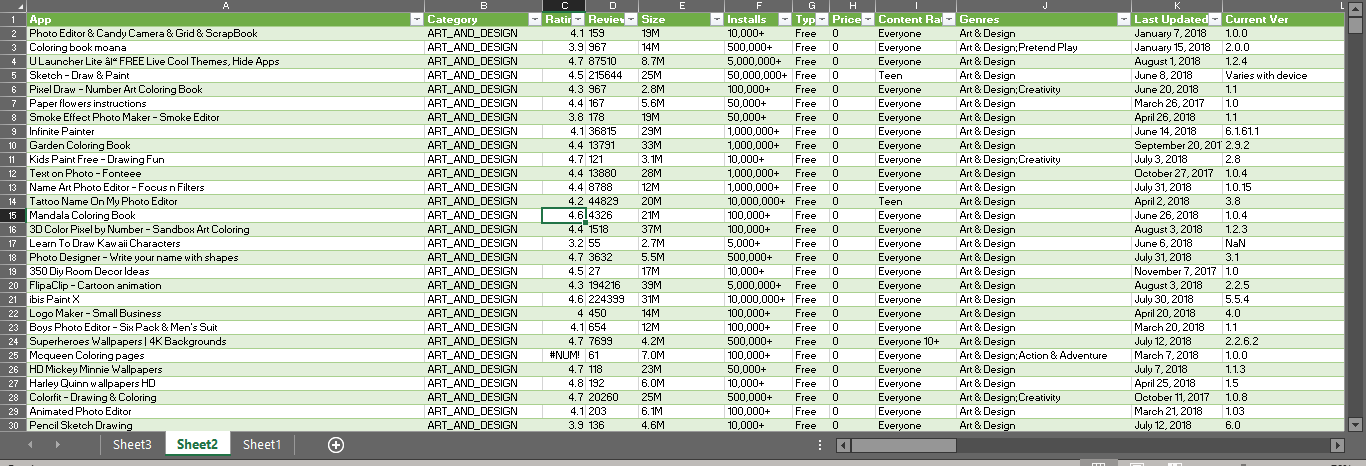

In [0]:
from IPython.display import Image
Image(filename='/content/Vlookup01.png')

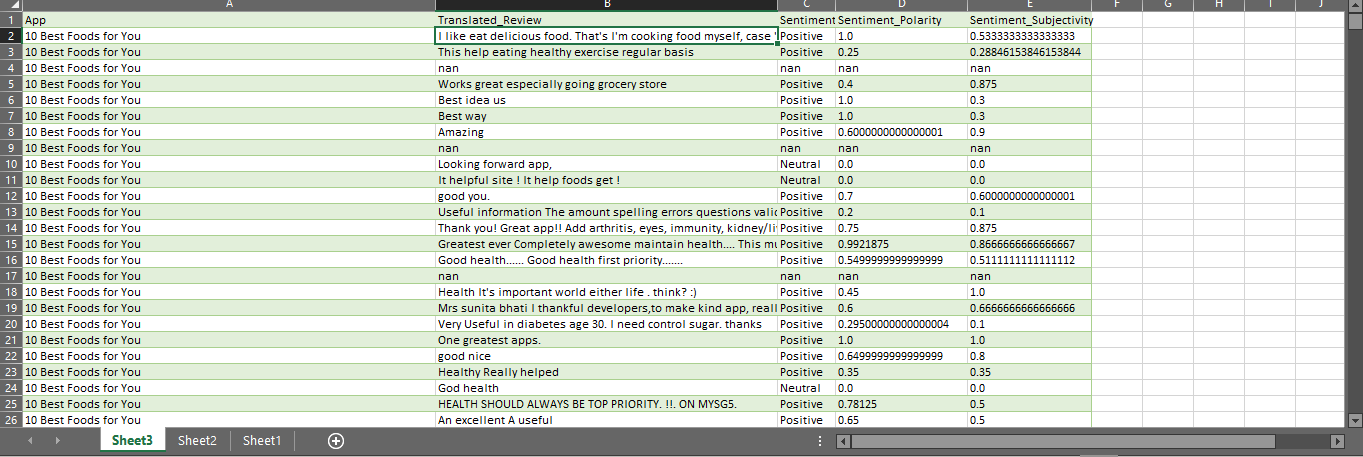

In [0]:
from IPython.display import Image
Image(filename='/content/Vlookup02.png')

```=VLOOKUP($A2, Sheet3!$A$2:$B64296, 2, FALSE)```

With this formula, we are telling Excel that based on App name (A2), from Sheet3 range A2 to B64296, give me the value on column 2 (B-- the translated review) and FALSE means that we want an exact match for the App name-- not an approximate match. 

## Perform Aggregation Operations

Now that the data has been combined we can perform different operations. 

For instance, we can calculate the average Ratings accross all apps on the play store.

```=ROUND(AVERAGE(Sheet2!C2:C10842), 2)```

Calculate the total reviews:

```=SUM(D1:D10842)```

To get a count based on a particular condition. For instance, we'd like to know how many Educational apps are there.

```=COUNTIF(J1:J10842, "Education")```



## Pivot Tables

We can create pivot tables to aggregate and perform operations on entire datasets.

For this example, we want to create a pivot table that that would list the app name and wheter it is free or paid in one column along with columns for the number of reviews and average rating. We also want to filter the apps by category. 

Once the data is loaded to the sheet we can select Insert and then Pivot Tables. This will open up a Pivot Table Fields menu where we can select and drag the column names to the desired functions that we want to display. 


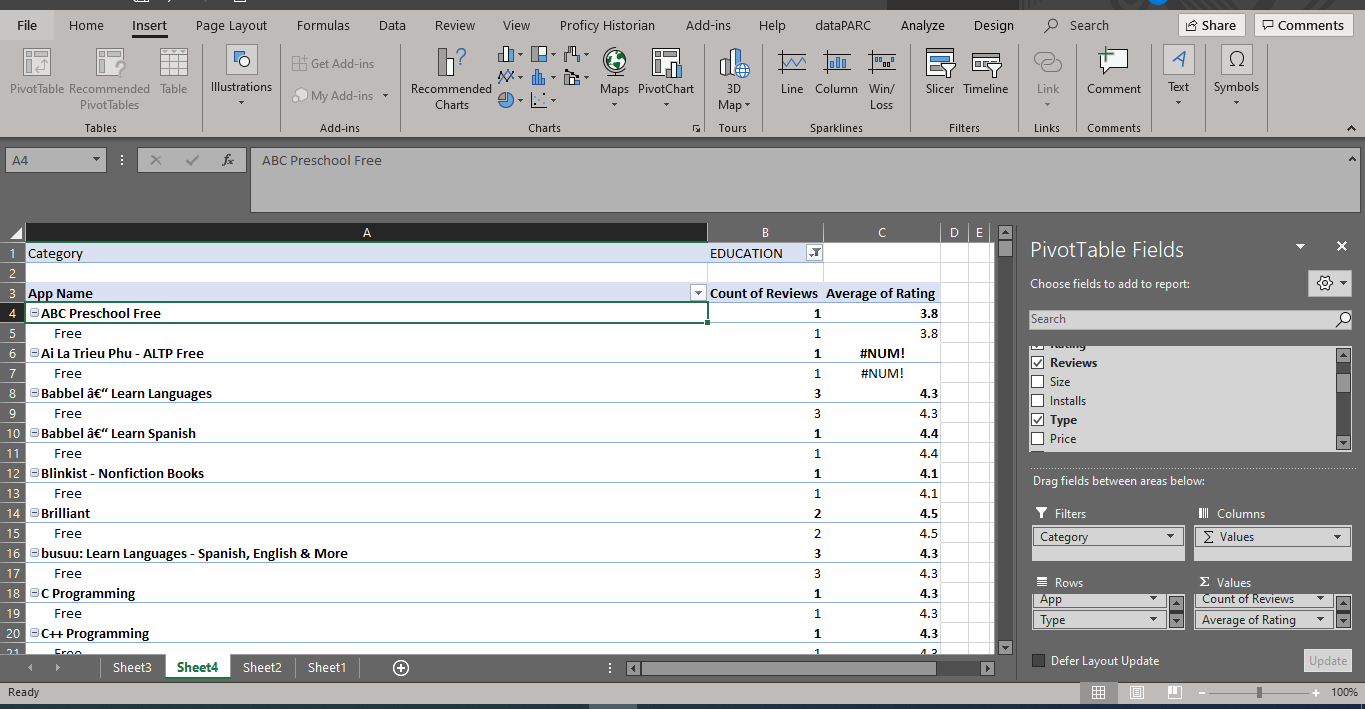

In [0]:
from IPython.display import Image
Image(filename='/content/Pivot001.png')

Since we want to list the app name and its type, we drag "App" and "Type" fields to the **Rows** section. We are using "Reviews" and "Ratings" for aggregation and drag these column names to "Values". Since we want to filter the apps by "Category", we drag that column to "Filters".
This shows how simple it is to construct a PivotTable to analyze and gather insights from our data. 

-------------------------------------------

## Combining and Shaping Data Using SQL

We are going to be working with a SQL database in Azure so we need to configure that first.

*   Create and login to a Microsoft Azure account
*   Create a storage account -- I configured everything using its defaults.
*   Create a new blob container --equivalent to S3 buckets in AWS.
*   Upload datasets to that container
*   Create an ETL (Extract, Transform, Load) pipeline to load data to the SQL database in Azure
*   Create a new SQL databse. Select the resource group that was previously created. 
   *   Create a name for the db
   *   Create a new SQL server -- create a name and login credentials
   *   We might experience issues connecting to the database server due to firewall errors. Ensure you add the IP address to the firewall rules.

Once everything is configured and we are successfully connected to the database, we can create a new table. 

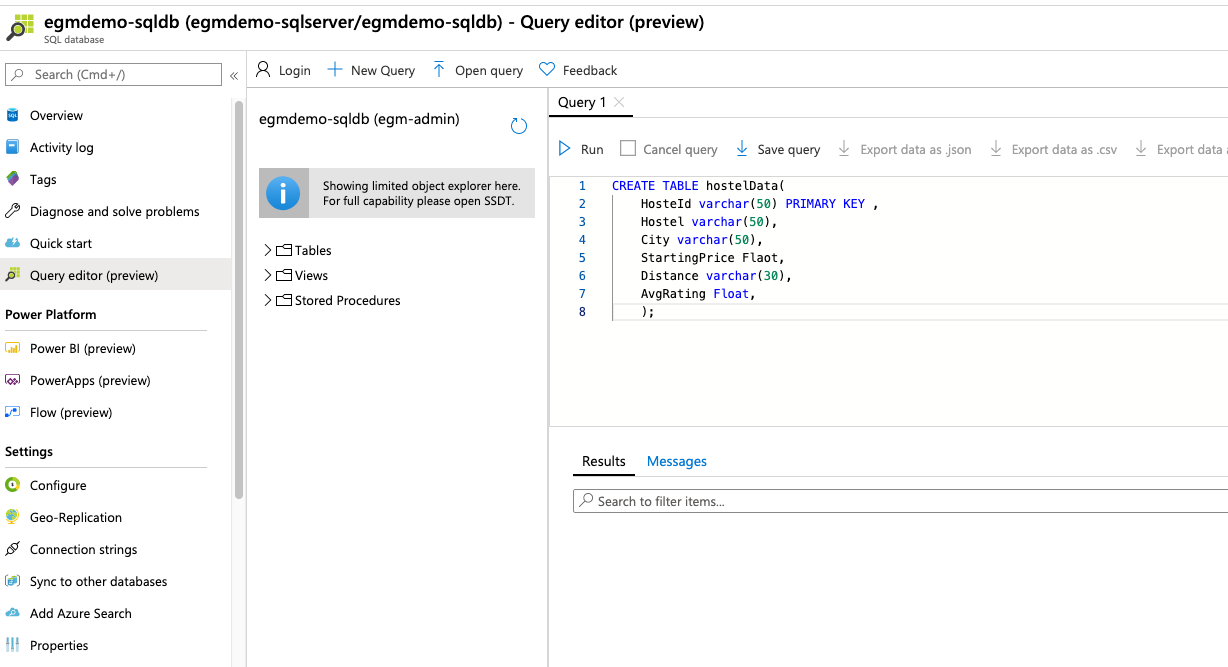

In [0]:
from IPython.display import Image
Image(filename='/content/CreateTable.png')

Create a new table for Booking Data and one for Honey Production

```
CREATE TABLE dbo.bookingData(
    BookingID varchar(20) PRIMARY KEY,
    HostelID varchar(20), 
    RoomsBooked int,
    );
```

```
CREATE TABLE dbo.HoneyProduction(
    State varchar(25) NOT NULL,
    Year  INT, 
    ProducedValue INT,
    );
```

Now that we have the SQL tables created, we can load data to them using Azure Data Factory which is a cloud-based data integration service that allows us to create workflows and to copy and transform our data and move it to the Azure cloud. For this we need to create a Data Factory:


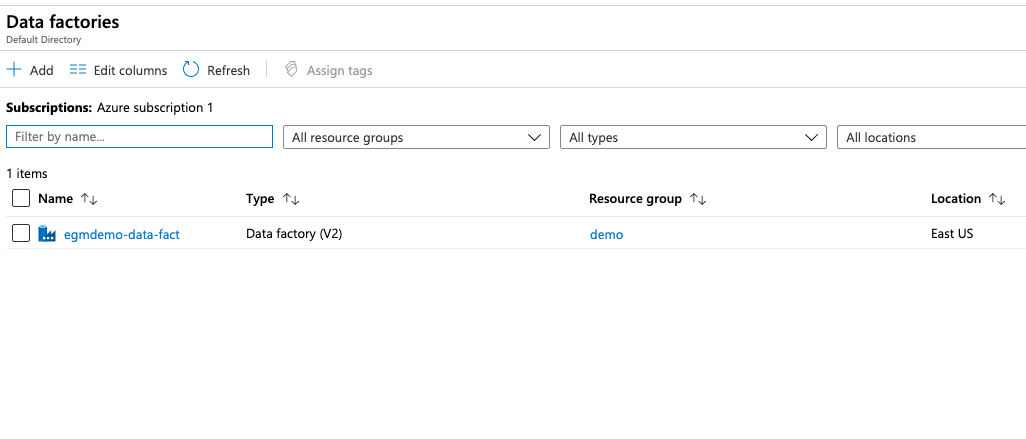

In [0]:
from IPython.display import Image
Image(filename='/content/DataFactory.png')

Once this is created, open the data factory and create a new pipeline by clicking on "Author & Monitor" this will take us to the the Azure Data Factory page and then select "Copy Data" to create the pipeline that will copy data from the source to the destination. Give the task a name-- for instace "CopyDataFromBlobToAzureSQLDB" and create a connection to the data source-- in this case to the Azure Blob. 

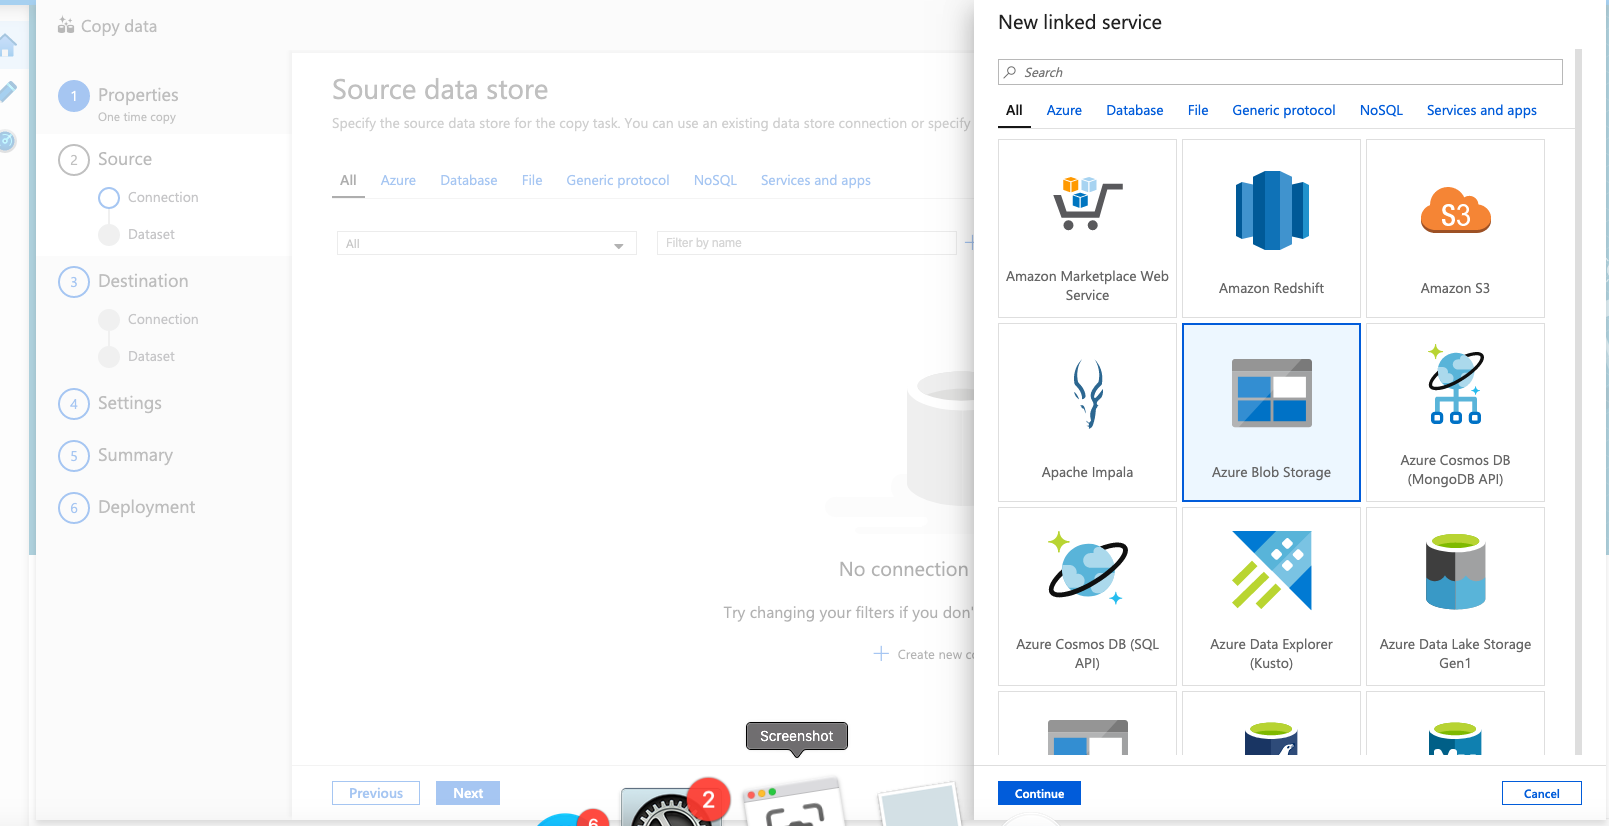

In [0]:
from IPython.display import Image
Image(filename='/content/DataBlobConnect.png')

Follow the prompts, I selected the default settings, check the connection-- if successful then we are good to proceed. 
The next step is to open the data link we created earlier. Once selected we should be able to see the dataset that are contained in that folder. Select the dataset of interest. We can preview the data and set file format settings for it. 
Once the dataset is selected we need to create a connection to the destination data by selecting 'Create new connection' and selecting the Azure SQL Database. Continue through the promps ensure we are selecting the database server and database names that we created earlier. 
When this step is completed, proceed to "Table Mapping" 
Once the tables are mapped and the data are loaded, we can run queries on our data. Here are a few examples:

To get the highest produced value:

``SELECT * FROM dbo.HoneyProduction
WHERE ProducedValue = (SELECT MAX(ProducedValue) FROM dbo.HoneyProduction)``

To get the number of unique states:

``SELECT COUNT(DISTINCT(State)) FROM dbo.HoneyProduction``

To get the lowest value produced:

``SELECT MIN(ProducedValue) FROM dbo.HoneyProduction``

To construct a PIVOT table that returns the total yearly production:

``SELECT [State], [2008], [2009], [2010], [2011], [2012]
FROM dbo.HoneyProduction
PIVOT
(
    SUM(ProducedValue)
    FOR Year IN ([2008], [2009], [2010], [2011], [2012])
) AS ProducedByYear;``

This is the same query as above but it stores the results ``INTO`` a new table:

``SELECT [State], [2008], [2009], [2010], [2011], [2012]
INTO dbo.HoneyProductionByYear
FROM dbo.HoneyProduction
PIVOT
(
    SUM(ProducedValue)
    FOR Year IN ([2008], [2009], [2010], [2011], [2012])
) AS ProducedByYear;``


## Working with Data Using Python

For these excercises we'll be working with the Mall Customer Dataset from Kaggle: [Mall Customer Dataset](https://www.kaggle.com/shwetabh123/mall-customers#Mall_Customers.csv) which can be downloaded to your machine and used in Colab/Jupiter notebook. 


In [0]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
# load data to a pandas 0df
mall_customer_info = pd.read_csv('/content/Mall_Customers.csv')
mall_customer_info.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
#explore df
mall_customer_info.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [0]:
mall_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [0]:
# get unique values
mall_customer_info.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

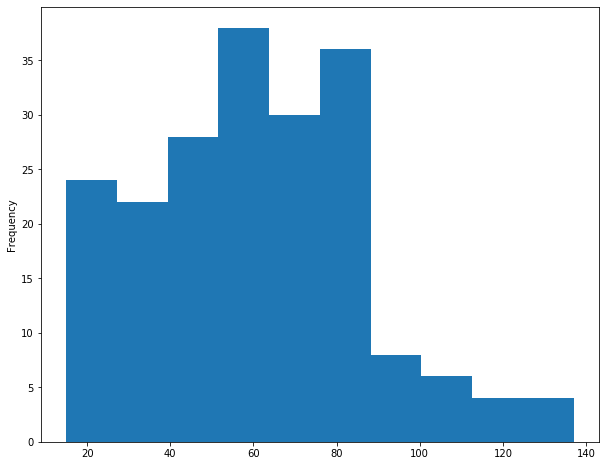

In [0]:
# Visualize Data
mall_customer_info['Annual Income (k$)'].plot.hist(bins=10, figsize=(10, 8));

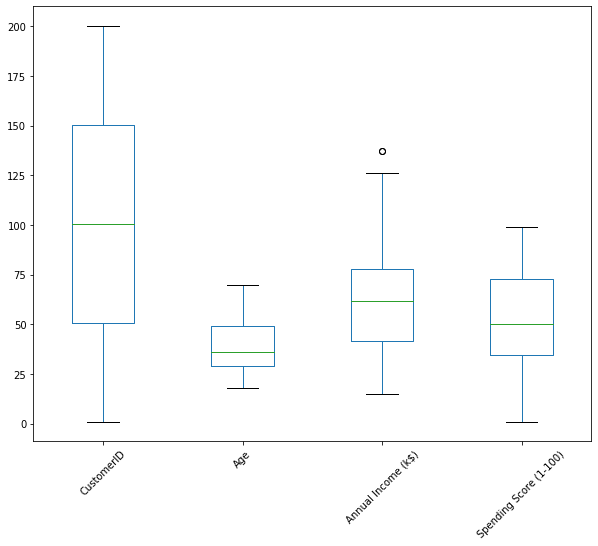

In [0]:
# Graph data on a boxplot 
boxplot = mall_customer_info.boxplot(grid=False, rot=45, figsize=(10,8));

We can see that there are ouliers on the Annual Income column.
We can retrive the rows that are greater than 125K.

In [0]:
mall_customer_info.loc[mall_customer_info['Annual Income (k$)'] > 125]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [0]:
# Calculate 25th and 75th percentile
Q1 = mall_customer_info['Annual Income (k$)'].quantile(0.25)
Q3 = mall_customer_info['Annual Income (k$)'].quantile(0.75)

In [0]:
print(Q1, Q3)

41.5 78.0


In [0]:
# Calculate Interquartile rate
IQR = Q3 - Q1
IQR

36.5

In [0]:
# Set min and max to be 1.5 * IQR
minimum = Q1 - 1.5 * IQR
maximum = Q3 + 1.5 * IQR
print(minimum, maximum)

-13.25 132.75


In [0]:
# create a new column that determines if a datapoint is an ourlier
# initialize entire column to False

mall_customer_info['Income_Outlier'] = False

In [0]:
# Iterate through Outlier column
for index, row in mall_customer_info.iterrows():
  if row['Annual Income (k$)'] > 125:
    mall_customer_info.at[index, 'Income_Outlier'] = True

In [0]:
mall_customer_info['Income_Outlier'].sum()

4

In [0]:
# replace outliers with mean
mean = mall_customer_info['Annual Income (k$)'].mean()
mean

60.56

In [0]:
for index, row in mall_customer_info.iterrows():
  if row['Income_Outlier'] == True:
    mall_customer_info.at[index, 'Annual Income (k$)'] = mean

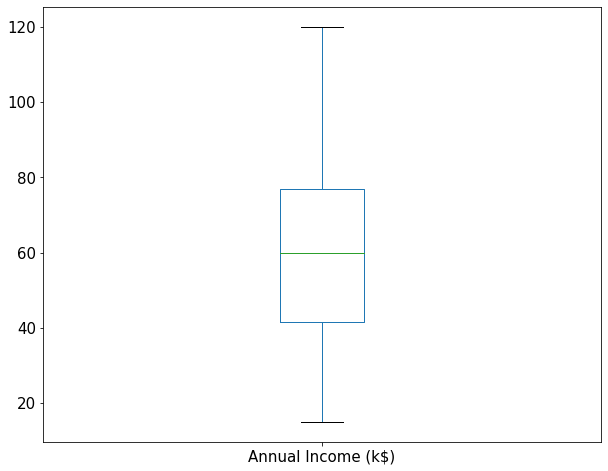

In [0]:
# Graph data on a boxplot 
boxplot = mall_customer_info.boxplot(grid=False, fontsize=15, column=['Annual Income (k$)'], figsize=(10,8));

## Detecting Outlier Using Z-Scores

Z-Score = all values expressed in terms of standard deviation from the mean.
The process of converting data to z-scores is referred to as standardizing the dataset. We can perform this manually or we can use the ``StandardScaler`` object from sklearn. 
We're going to instantiate the ``StandardScaler`` and invoke the ``fit_transform`` method to the 'Annual_Income' column. ``fit_transform`` will standardize all numeric features that are specified as input by *subtracting the mean from all values in our dataset and dividing by the standard deviation* All the numeric data would be expressed in terms of z-scores or standard deviations from the mean. 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")  

In [0]:
# Load data
customers_data = pd.read_csv("/content/Mall_Customers.csv")
customers_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
# Standardize Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_annual_income = scaler.fit_transform(customers_data['Annual Income (k$)'].values.reshape(-1,1))

In [0]:
scaled_annual_income.shape

(200, 1)

In [0]:
# Create a new column for standardized data

customers_data['Scaled_Annual_Income'] = scaled_annual_income
customers_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Scaled_Annual_Income
0,1,Male,19,15,39,-1.738999
1,2,Male,21,15,81,-1.738999
2,3,Female,20,16,6,-1.700830
3,4,Female,23,16,77,-1.700830
4,5,Female,31,17,40,-1.662660


In [0]:
customers_data['Scaled_Annual_Income'].describe()

count    2.000000e+02
mean    -6.128431e-16
std      1.002509e+00
min     -1.738999e+00
25%     -7.275093e-01
50%      3.587926e-02
75%      6.656748e-01
max      2.917671e+00
Name: Scaled_Annual_Income, dtype: float64

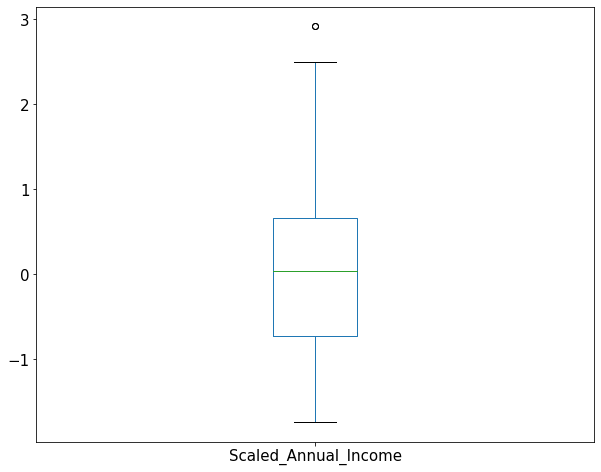

In [0]:
# boxplot standardize data
customers_data.boxplot(figsize=(10,8), grid=False,
                      fontsize=15, column=['Scaled_Annual_Income']);

In [0]:
# find outliers -- returns the indices
outliers = np.where(customers_data['Scaled_Annual_Income'] > 2)
outliers

(array([192, 193, 194, 195, 196, 197, 198, 199]),)

In [0]:
# lokk up indices
customers_data.iloc[outliers]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Scaled_Annual_Income
192,193,Male,33,113,8,2.001605
193,194,Female,38,113,91,2.001605
194,195,Female,47,120,16,2.268791
195,196,Female,35,120,79,2.268791
196,197,Female,45,126,28,2.497807
197,198,Male,32,126,74,2.497807
198,199,Male,32,137,18,2.917671
199,200,Male,30,137,83,2.917671


In [0]:
# We can drop these ouliers by running:
#customers_data_no_outliers = customers_data.drop(customers_data.index[outliers])

## Handling Missing Values in a Dataset

For this excercise, create a toy dataframe containing missing values or NAs.

In [0]:
df = pd.DataFrame(data={'col1' : [0, np.nan, 2, 3, 4, np.nan, np.nan],
                        'col2' : [100, 500, 200, 300, 400, 600, 800] })
df

,col1,col2
0,0.0,100
1,NaN,500
2,2.0,200
3,3.0,300
4,4.0,400
5,NaN,600
6,NaN,800


In [0]:
# to check if the df as nan values:
df.isnull()

,col1,col2
0,False,False
1,True,False
2,False,False
3,False,False
4,False,False
5,True,False
6,True,False


In [0]:
df.isnull().sum()

col1    3
col2    0
dtype: int64

There are several ways to deal with missing values. 
We can apply the ``fillna(method='pad', limit=1)`` and this will carry the last data point forward (forward fill) but it will only do so for one value as specified by the limit. 
Another method is ``fillna(method='bfill')`` which would take the value after the nan and backfill it.  
We can also drop the rows containing nans by running ``df.dropna(axis=1)``
``axis=0`` would drop the columns containing nan values. 
We can also drop columns with missing values, if the number of nans in the column exceed a certain threshold-- for instance drop the nan if 90% of data is present in that column: ``df.dropna(thresh=int(df.shape[0]*.9, axis=1``
We can also use mean substitution: ``df['col1'].fillna(df['col1'].mean()``
Interpolation is another option: ``df['col1'].interpolate()``


In [0]:
df.fillna(method='pad', limit=1)

,col1,col2
0,0.0,100
1,0.0,500
2,2.0,200
3,3.0,300
4,4.0,400
5,4.0,600
6,NaN,800


## Cleaning up Data

For this excersice, we're going to work witht the auto-mpg dataset.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_data = pd.read_csv("/auto-mpg.csv")
car_data.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
car_data.shape

(392, 9)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

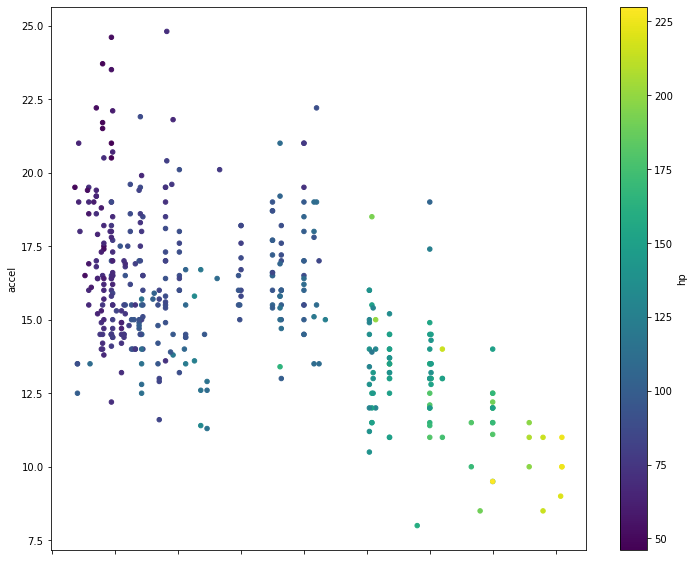

In [4]:
# Explore data by plotting a scatter plot for certain attributes
car_data.plot.scatter(x='displ',
                      y='accel',
                      c='hp',
                      colormap='viridis',
                      figsize=(12,10))

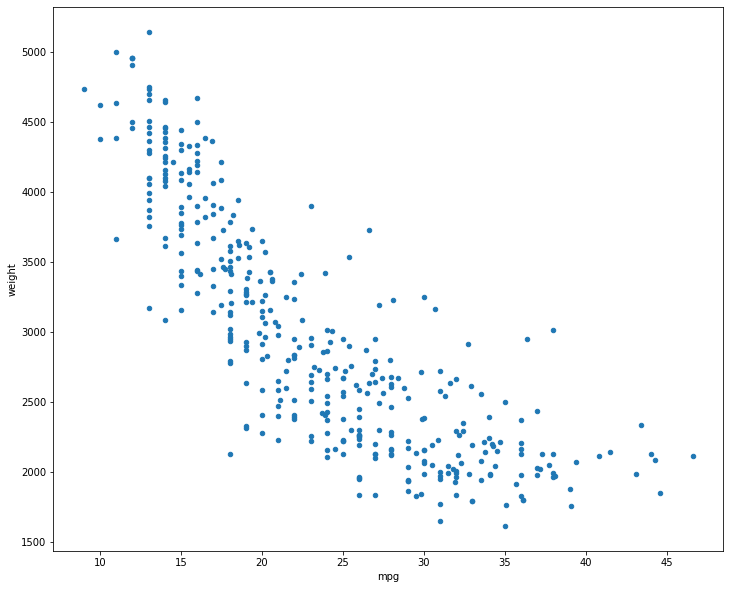

In [6]:
car_data.plot.scatter(x='mpg',
                      y='weight',
                      figsize=(12,10))

In [7]:
car_data.isnull().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [8]:
car_data['yr'].head(10)

0    70
1    70
2    70
3    70
4    70
5    70
6    70
7    70
8    70
9    70
Name: yr, dtype: int64

In [10]:
car_data.describe()

,mpg,cyl,displ,hp,weight,accel,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg       392 non-null float64
cyl       392 non-null int64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
yr        392 non-null int64
origin    392 non-null int64
name      392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


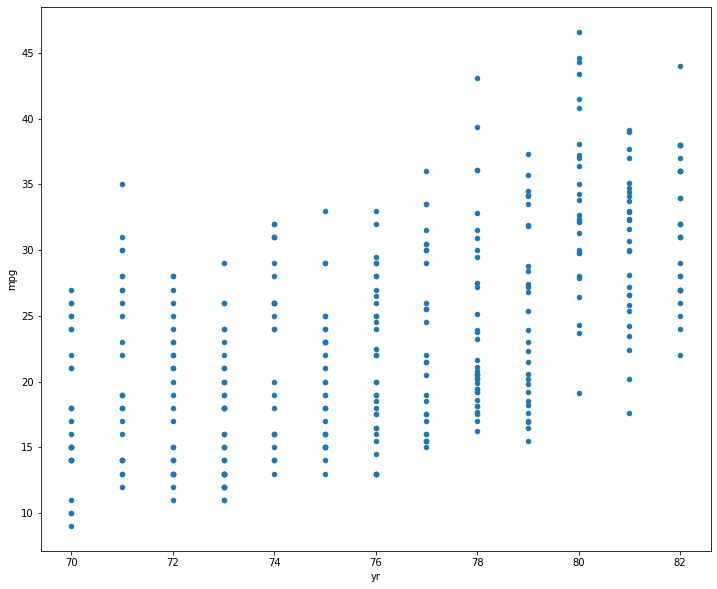

In [12]:
car_data.plot.scatter(x='yr',
                      y='mpg',
                      figsize=(12,10))

## Working with Imbalanced Data

We can come across imbalanced data set that might have bias data. To deal with this issue we can oversample datapoints that are not frequent in the dataset to make the more representative and undersample common datapoints to reduce their overall impact.

For this example we'll use the diabetes dataset from Kaggle:
[diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data#diabetes.csv)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
diabetes_data = pd.read_csv('/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
diabetes_data.shape

(768, 9)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

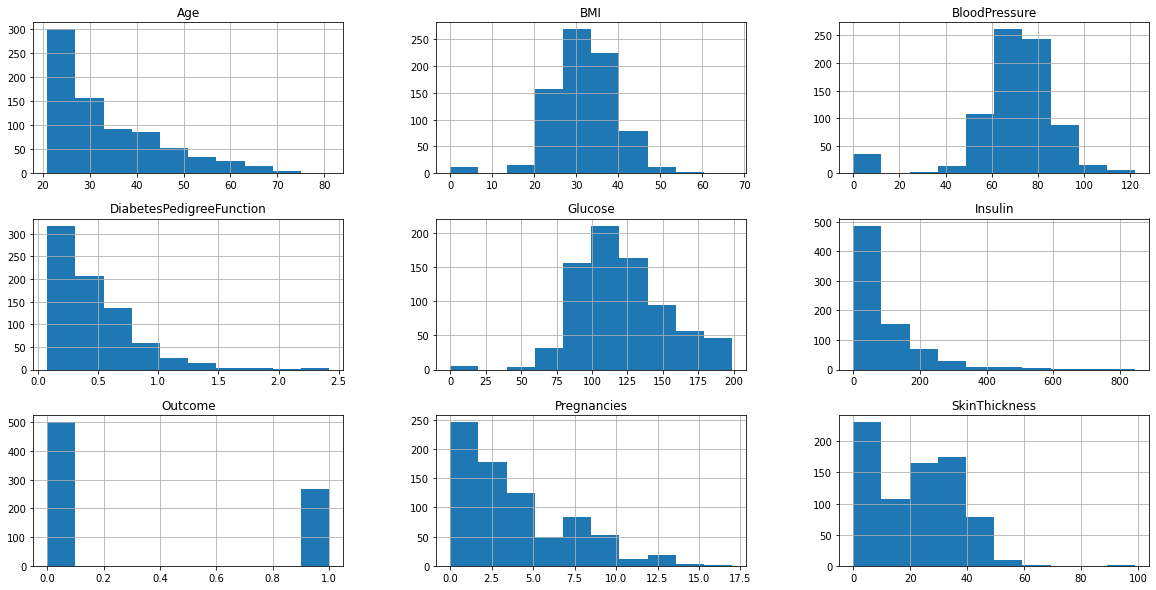

In [16]:
# Explore data by plotting Histograms for all fields

diabetes_data.hist(figsize=(20, 10));

In [0]:
# the outcome field (people who had been diagnosed with diabetes) seems imbalance
# let's explore it further

outcome_count = diabetes_data.Outcome.value_counts()

Class 0: 500
Class 1: 268
Proportion: 1.87 :1


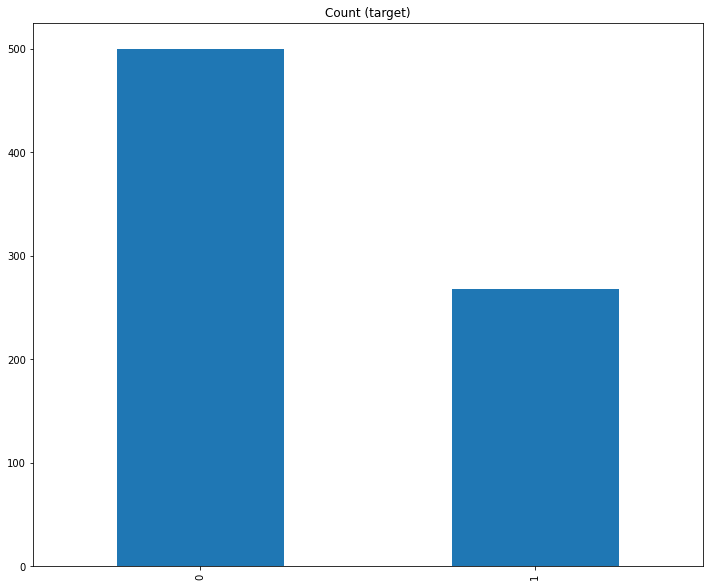

In [18]:
print('Class 0:', outcome_count[0])
print('Class 1:', outcome_count[1])
print('Proportion:', round(outcome_count[0] / outcome_count[1], 2), ':1')

outcome_count.plot(kind='bar', title='Count (target)', figsize = (12, 10));

In [0]:
# Create a classifier to diagnose cases

y = diabetes_data.Outcome
X = diabetes_data.drop('Outcome', axis=1)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 27)

In [0]:
# Build the classifier
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear')

In [24]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# make predictions
y_pred = logistic_model.predict(X_test)

In [26]:
pd.crosstab(y_pred, y_test)

Outcome,0,1
row_0,,
0,111,31
1,19,31


In [0]:
from sklearn import metrics

In [28]:
metrics.accuracy_score(y_test, y_pred)

0.7395833333333334

In [29]:
metrics.precision_score(y_test, y_pred)

0.62

In [30]:
metrics.recall_score(y_test, y_pred)

0.5

In [0]:
X = pd.concat([X_train, y_train], axis=1)

In [0]:
X = X.reset_index(drop=True)

In [0]:
non_diabetic = diabetes_data[diabetes_data.Outcome==0]

diabetic = diabetes_data[diabetes_data.Outcome==1]

In [0]:
# resample data
from sklearn.utils import resample

In [0]:
over_sampled = resample(diabetic,
                        replace=True,
                        n_samples=len(non_diabetic),
                        random_state=27)

In [0]:
over_sampled = pd.concat([non_diabetic, over_sampled])

over_sampled = over_sampled.reset_index(drop=True)

In [37]:
over_sampled.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
215,3,99,62,19,74,21.8,0.279,26,0
549,7,129,68,49,125,38.5,0.439,43,1
912,5,168,64,0,0,32.9,0.135,41,1
774,1,199,76,43,0,42.9,1.394,22,1
266,1,80,74,11,60,30.0,0.527,22,0


In [0]:
outcome_count = over_sampled.Outcome.value_counts()

Class 0: 500
Class 1: 500
Proportion: 1.0 :1


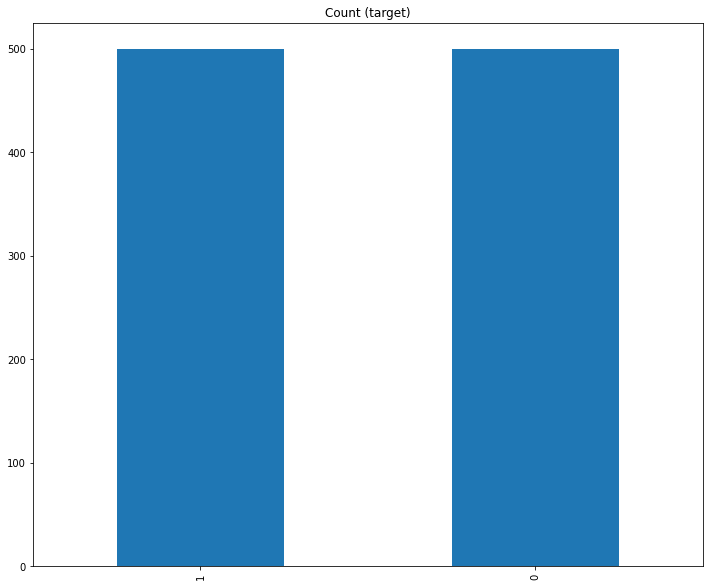

In [41]:
print('Class 0:', outcome_count[0])
print('Class 1:', outcome_count[1])
print('Proportion:', round(outcome_count[0] / outcome_count[1], 2), ':1')

outcome_count.plot(kind='bar', title='Count (target)', figsize=(12, 10));

In [0]:
y_train = over_sampled.Outcome

X_train = over_sampled.drop('Outcome', axis=1)

In [0]:
logistic_model = LogisticRegression(solver='liblinear')

In [44]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logistic_model.predict(X_test)

In [46]:
pd.crosstab(y_pred, y_test)

Outcome,0,1
row_0,,
0,99,17
1,31,45


In [47]:
metrics.accuracy_score(y_test, y_pred)

0.75

In [48]:
metrics.precision_score(y_test, y_pred)

0.5921052631578947

In [49]:
metrics.recall_score(y_test, y_pred)

0.7258064516129032

## Combining Data from Disparate Sources

When working with data, it is the case that data do not come from a single system (e.g. a SQL Database) but data can be combined from different sources. 
Data can be **transactional** and ** analytical** and these are their differences:

### Transactional Data Processing
*   Ensures correctness of individual entries
*   Access to recent data-- from the last few hours or days
*   Updates data
*   Fast real-time access
*   Usually from a single data source

### Analytical Data Processing
*   Analyzes large batches of data
*   Access to older data going back months or years
*   Mostly reads data
*   Long-running jobs
*   Multiple data sources

## Small Data vs Big Data

Transactional and analytical data that can be processed using the same database system, in a single machine, that can be accessed indivually and its entirety with no replication and that is available immediately can be considered small data.
When data do not meet the criteria above-- they can be considered big data. Big data do not fit into a single system and it is served/replicated by a cluster of machines.

### 3 Vs of Big Data

1.   Volume -- Amount of Data
2.   Variety -- Number of type of sources
3.   Velocity -- Batch and Streaming 

Big Data can be processed using two different systems:
A traditional RDBMS for transactional data and a Data Warehouse for Analytical Data. 

### Data Warehouse
Structured data store used for analytical processing and reporting; usually hold transformed data fed in from disparate sources via ETL (extract, Transform, Load) Pipelines. 

### ETL Pipelines
Programs or scripts with business logic to automatedly extract data from disparate sources, transform it to satisfy a schema, then load it into a data warehouse. 

This can be achieved by using Azure Data Factory-- which is a managed service meant for building complex, hybrid ETL pipelines that integrate data silos and can include Hadoop and Machine Learning transformations. 




### Batch and Stream Processing of Data

**Bounded** (where all the data are known upfront) datasets are processed in **batches**
*   Bounded, finite datasets
*   Slow pipeline from data ingestion to analysis (collect, store, process)
*   Periodic updates on output as jobs complete  
*   Order of data received is unimportant
*   Single global state at any point in time -- we know what we're working with
*   Data are stored in files and databases within the organization infrastructure -- reliable storage as the source of truth 

**Unbounded** (where data are not known upfront) are processed as **streams**
*   Unbounded, infinite datasets
*   Processing immediate-- as data is received.
*   Continuoous updates as jobs run constantly
*   Order is important, out of order arrival is tracked
*   No global state, only history of events received. 
*   Data can be stored in several systems such as files, dbs and streams and processed in a Stream-first Architecture. 


